# Comparação dos Modelos
    

# 

# 1. Introdução

Neste notebook vamos fazer a comparação de dois modelos de redes neurais para classificação: um modelo MLP (Multilayer Perceptron) e um modelo CNN (Rede Neural Convolucional).<br>
Ambos os modelos são treinados com dados extraídos de características de ficheiros de áudio. Depois é testada a performance de cada, comparando a precisão, o tempo de treino, e outras métricas.

# 

# 2. Features extraídas para cada modelo

**MLP**

Features extraídas:

      Mel-spectrogram (1D)
      Chromagram (1D)
      Spectral centroid (1D)
      Spectral bandwidth (1D)
      Spectral flatness (1D)
      Spectral rolloff (1D)

  Manipulação do Input 1D para MLP: as features são tratadas como vetores 1D. Cada um é convertido para um array numérico, com formato adequado, para as camadas densas do modelo MLP.

######

**CNN**

Features extraídas:

    Mel-spectrogram (2D)
    Chromagram (2D)
    Junção das spectral features (2D)

Manipulação do Input 2D para CNN: os inputs são tratados como imagens de forma a manter o formato 2D. Isso é importante para que as camadas convolucionais possam extraír padrões espaciais.

# 

# 3. Estrutura geral dos modelos

**MLP**
*  Pipelines separadas para cada input;
*  Função de ativação LeakyReLU com alpha=0.1;
*  Regularização com uso de dropout constante a 30% e L2 a 0.001;
*  Concatenação dos inputs depois de processados;
*  Normalização desses mesmos inputs com BatchNormalization;
*  Input Layer constituída por 6 inputs 1D. Melspectrogram, chromagram e os restantes 4 são as spectral features;
*  Output Layer tem os 10 neurónios finais, cada um representando uma classe;
*  Total de 1611466 parâmetros, dos quais 1610954 são treináveis (weights e biases) e os restantes 512 não são treináveis (kernel_regularizer, negative_slope, dropout, ...).

**CNN**
*   Pipelines separadas para cada input;
*   Camadas convolucionais com número de filtros e kernel size adaptados às dimensões do input;
*   MaxPooling adaptado às dimensões do input;
*   Padding estabelecido como Same;
*   Kernel initializer é He Normal;
*   Função de ativação ReLU;
*   Regularização com uso de Dropout constante a 20% e L2 a 0.05;
*   Concatenação dos inputs depois de processados e achatados;
*   Input Layer constituída por 3 inputs 2D. Melspectrogram, Chromagram e a junção das spectral features;
*   Output Layer tem os 10 neurónios finais e cada um representa uma classe;
*   Total de 3400378 parâmetros, todos treináveis (weights e biases).

# 

# 4. Diferenças no treino dos modelos

**Treino MLP**

  Epochs: <=500

  Optimizer: Adam

  Learning Rate: 0.001 (depois adaptada pelo optimizer)

  Early Stopping: usado para evitar overfitting. Monitoriza a validação e para se não houver melhoria durante algumas iterações consecutivas. <br>
  No nosso modelo, se não detetar melhorias na validation loss depois de 100 epochs, para o treino, mas nunca prematuramente, pois permite que sejam executadas, pelo menos, 100 epochs.


**Treino CNN**

Epochs: =50

Optimizer: Adam

Learning Rate: 0.001 (depois adaptada pelo optimizer)

Early Stopping: não foi implementado pois causava vários problemas. O kernel não aguenta mais de 70 epochs e, a paragem prematura leva a resultados não ótimos e por isso achámos desnecesário acrescentar early stopping.

# 

# 5. Resultados do Treino

**Tempo de Treino:**

Para o MLP, o tempo de treino foi inferior devido à menor complexidade do modelo, cerca de 2 horas. <br>
O modelo CNN já levou mais tempo, devido a um número maior de parâmetros e camadas, por volta de 5 horas.

###### 

**Loss e Accuracy de Treino e Validação:**

**MLP**

Para todos os folds, enquanto se dá um decréscimo da training loss ao longo das epochs, acontece o mesmo com o validation loss.
Esta tendência mostra que o modelo está a aprender bem e a generalizar corretamente.<br>
Quanto à accuracy, com a passagem das epochs, tanto a training accuracy como a validation accuracy aumentam.

**CNN**

Tal como no MLP, para todos os folds, enquanto se dá um decréscimo da training loss ao longo das epochs, o mesmo acontece com o validation loss. Enquanto que no MLP este decréscimo se dava de forma gradual, neste caso vemos uma descida bastante mais abrupta, que estabiliza a partir da quinta epoch e a partir daí desce com declive menor.
Esta tendência mostra que o nosso modelo está a aprender muito bem e a generalizar bastante corretamente.<br>
Quanto à accuracy, com a passagem das epochs, tanto a training accuracy como a validation accuracy aumentam.

######

**Resultados de Accuracy:**

**MLP**

Como resultado de test accuracy final temos 50.89%, com 4.89% de standard deviation.

	      (%)      Acc	SD
	Training:	  70.56  2.12
	Validation:	76.02  2.30
	Test:	      50.89  4.89


**CNN**

Resultado de test accuracy final de 65.48%, com 5.51% de standard deviation.<br>
Um aumento de quase 15%, uma melhoria enorme face à accuracy obtida no modelo anterior.

	      (%)      Acc	SD
	Training:	  86.77  0.82
	Validation:	87.01  0.67
	Test:	      65.48  5.51

######

**Confusion Matrix:**

**MLP**


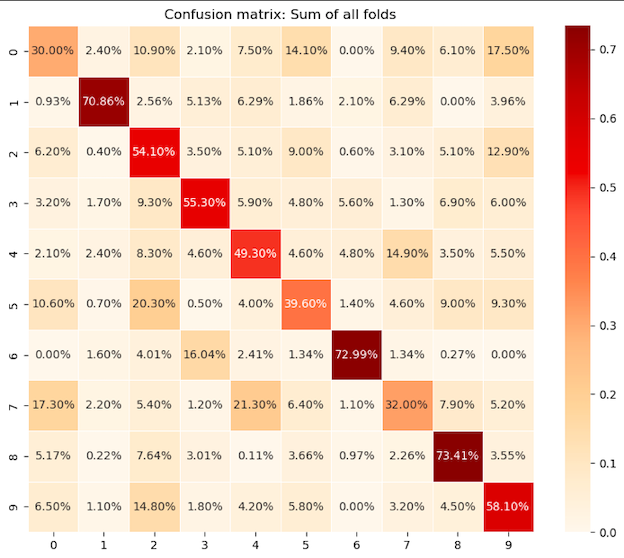

6 classes com previsão correta superior a 50% e 4 classes com previsão correta inferior a 50%.

A classe com melhor taxa de previsão correta é a classe 8 "siren" (73.41%), seguida da classe 6 "gun_shot" (72.99%).

A classe com pior taxa de previsão correta é a classe 0 "air_conditioner" (30.00%), seguida da classe 7 "jackhammer" (32%).

**CNN**

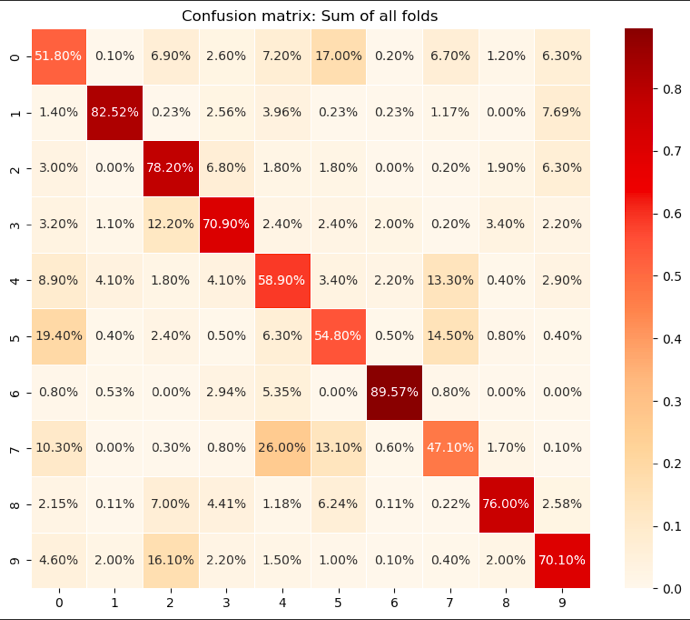

Temos um total de 9 classes com previsão correta superior a 50% e apenas 1 classe com previsão correta inferior a 50% (classe 7 "jackhammer").

A classe com melhor taxa de previsão correta é a classe 6 "gun_shot" (89.57%) seguida da classe 1 "car_horn" (82.52%).

A classe com pior taxa de previsão correta é a classe 7 "jackhammer" (47.10%), seguida da classe 0 "air_conditioner" (51.80%).

Diversas melhorias face à obtida no MLP, passando de 4 classes com previsão correta inferior a 50% para apenas 1 classe e todas com um aumento na sua taxa de previsão correta.

# 

# 6. Conclusões

O nosso modelo MLP tem uma grande dificuldade em classificar áudios ruidosos.<br>
Por outro lado, tem facilidade em classificar áudios com características únicas.<br>
O teste de várias versões deste modelo com diferentes inputs, early stoppers, regularizadores de pesos e outras variáveis, mostrou melhorias, mas apenas até um certo nível. Mesmo com o aumento da sua complexidade, a accuracy não aumentava significativamente.<br>
Consideramos que o nosso modelo é um classificador suficiente para este dataset e que dificilmente conseguirá alcançar melhores resultados.<br>
Para este problema de "estagnação de performance" resolvemos desenvolver um modelo CNN.

No nosso modelo CNN, obtivemos um enorme aumento na accuracy do modelo e o padrão encontrado no modelo MLP foi bastante mitigado.<br>
O grande problema deste modelo é a sua complexidade. Os seus tempos de treino são bastante grandes.<br>
Tínhamos uma accuracy relativamente baixa no modelo anterior e a nossa solução foi desenvolver um modelo CNN. A sua execução mostrou os resultados desejados.

**Notas Finais**<br>
- Será também importante notar que no website do dataset que estamos a utilizar (https://urbansounddataset.weebly.com/urbansound8k.html), é mencionado que os folds têm diferentes dificuldades. Isto é, a performance do modelo treinado, por exemplo, nos folds 2-9 e testado no fold 1, tende a ser mais baixa do que em outros casos.<br>
Provavelmente, estes folds terão maior quantidade de áudios ruidosos.<br>
- No 10-fold cross-validation, usamos 9 folds de teste e retirámos 20% destes folds para validação. O recomendado seria utilizar 8 folds para teste, 1 para validação e 1 para teste. Este erro só foi visto após a conclusão do trabalho. Implementamos este mecanismo, testando-o, e concluímos que os resultados não diferiram muito dos que tinham sido obtidos anteriormente, pelo que não achamos ser um problema muito impactante. Entendemos que possa afetar mais no nosso primeiro modelo, onde usamos early stopping que monitoriza a validation loss, que seria diferente se usássemos o método proposto. Ainda assim, a diferença não foi muito significativa.